In [1]:
import sys
sys.path.append('../')

In [2]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 

from main import VarFourier, ZGR_ansatz, symmetric_ansatz

np.random.seed(0)

In [3]:
num_qubits = 5
num_layers = 1

In [4]:
# 1 qubit is added at symmetrization
base_ansatz = ZGR_ansatz(num_qubits-1, num_layers)
ansatz_sym = symmetric_ansatz(base_ansatz=base_ansatz)

var_state = ansatz_sym.construct_circuit
num_params = ansatz_sym.num_params

(<Figure size 3900x600 with 1 Axes>, <Axes: >)

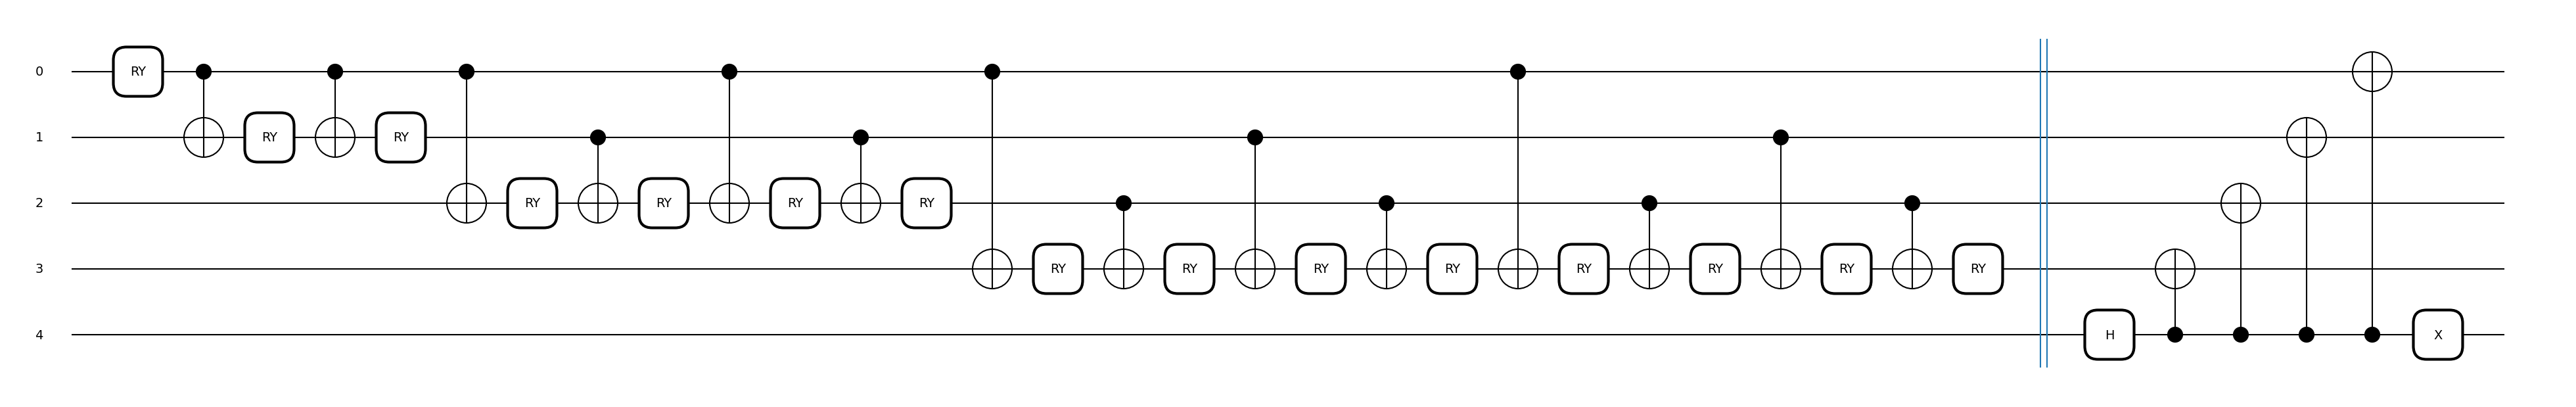

In [5]:
qml.draw_mpl( var_state, wire_order=range(num_qubits))( num_params*[0] )

In [6]:
device = qml.device("lightning.qubit", 
                    wires=num_qubits)

varqft = VarFourier( num_qubits,
                    lambda x : -0.5/np.abs(x),
                    lambda p : 0.5*p**2,
                    device,
                    xmin = -40,
                    xmax = 40,
                    var_state = var_state,
                    semi_classical = False)

In [7]:
vals, vecs = varqft.energy_eigens()
vecs = [vec for vec in vecs.T]

In [8]:
params_init = 1e-3 * np.random.randn( num_params )

params_ground, energies_ground = varqft.run(params_init,
                                            max_iterations=300,
                                            learning_rate=0.1,
                                            conv_tol=1e-6)

print(f'Optimal energy: {vals[0]:.6f}')

Step:    133, Energy:    -0.321345
Optimal energy: -0.321348


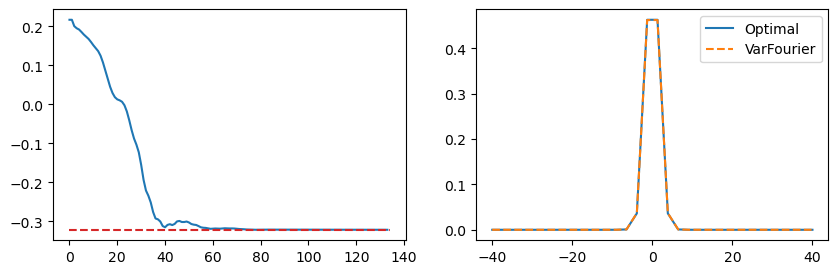

In [9]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot(energies_ground)
ax[0].hlines(vals[0], 0, len(energies_ground), colors='tab:red', linestyles='--') 

ground_state = varqft.state( params_ground[-1] )

ax[1].plot(varqft.x_values, np.abs(vecs[0])**2) 
ax[1].plot(varqft.x_values, np.abs(ground_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [10]:
fidelity = abs(np.vdot(ground_state, vecs[0]))**2
fidelity

0.9999933614051711

In [11]:
ansatz_antisym = symmetric_ansatz(ZGR_ansatz(num_qubits-1, num_layers),
                                  antisymmetric=True)

ortho_values = [ 25 ]
ortho_params = [ np.copy(params_ground[-1]) ]
ortho_circuits = [ ansatz_sym.construct_circuit ]

varqft.set_var_state(ansatz_antisym.construct_circuit)

varqft.set_ortho(values = ortho_values,
                 params = ortho_params,
                 circuits = ortho_circuits)

In [12]:
params_init_ex = 1e-3 * np.random.randn(num_params)

params_excited, energies_excited = varqft.run(params_ground[-1],
                                              max_iterations=500,
                                              learning_rate= 0.1,
                                              conv_tol=1e-6)

print(f'Optimal energy: {vals[1]:.6f}')

Step:    117, Energy:    -0.137415
Optimal energy: -0.137537


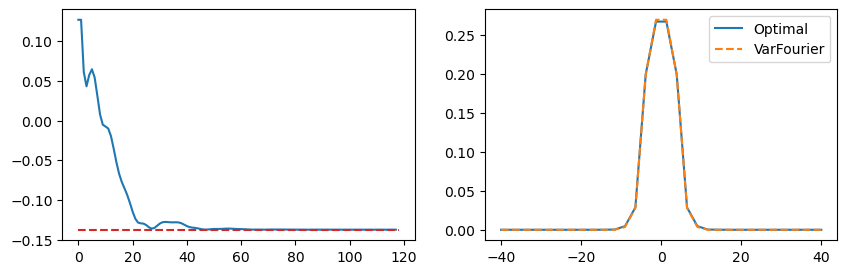

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10,3) ) 

ax[0].plot(energies_excited)
ax[0].hlines(vals[1], 0, len(energies_excited), colors='tab:red', linestyles='--' ) 

excited_state = varqft.state(params_excited[-1])

ax[1].plot(varqft.x_values, np.abs(vecs[1])**2) 
ax[1].plot(varqft.x_values, np.abs(excited_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [14]:
fidelity = abs(np.vdot(excited_state, vecs[1]))**2
fidelity

0.9991095206419306

In [15]:
varqft.add_ortho(values = [25],
                 params = [params_excited[-1]],
                 circuits = [ansatz_antisym.construct_circuit])

varqft.set_var_state(ansatz_sym.construct_circuit)



In [16]:
params_init_ex2 = 1e-3 * np.random.randn( num_params )

params_excited2, energies_excited2 = varqft.run(params_init_ex2,
                                                max_iterations=300,
                                                learning_rate=0.1,
                                                conv_tol=1e-5)

print(f'Optimal energy: {vals[2]:.6f}')

Step:    157, Energy:    -0.044683
Optimal energy: -0.044791


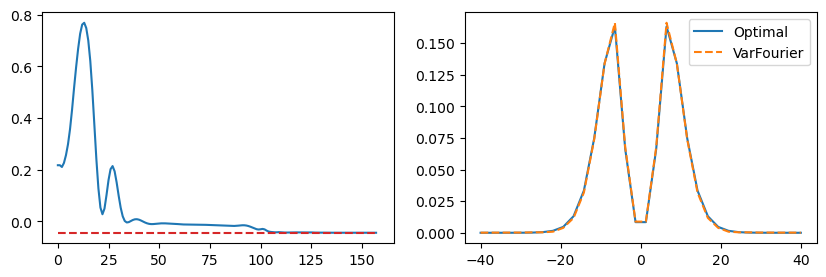

In [17]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot(energies_excited2)
ax[0].hlines(vals[2], 0, len(energies_excited2), colors='tab:red', linestyles='--' ) 

excited_state2 = varqft.state( params_excited2[-1] )

ax[1].plot(varqft.x_values, np.abs(vecs[2])**2) 
ax[1].plot(varqft.x_values, np.abs(excited_state2)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [18]:
fidelity = abs(np.vdot(excited_state2, vecs[2]))**2
fidelity

0.9987309016468645

In [19]:
varqft.add_ortho(values = [25],
                 params = [params_excited2[-1]],
                 circuits = [ansatz_sym.construct_circuit])

varqft.set_var_state(ansatz_antisym.construct_circuit)

In [20]:
params_init_ex3 = 1e-3 * np.random.randn( num_params )

params_excited3, energies_excited3 = varqft.run(params_init_ex3,
                                                max_iterations=300,
                                                learning_rate=0.1,
                                                conv_tol=1e-6)

print(f'Optimal energy: {vals[3]:.6f}')

Step:    202, Energy:    -0.032188
Optimal energy: -0.032590


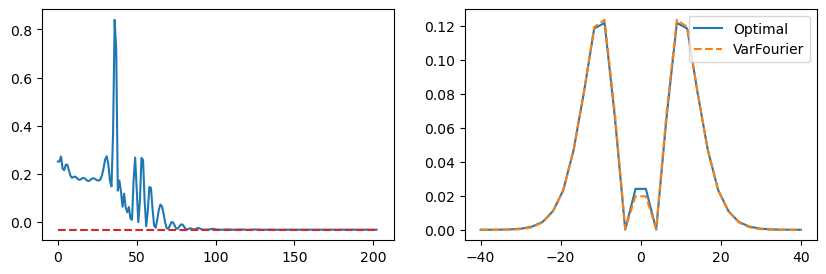

In [21]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot(energies_excited3)
ax[0].hlines(vals[3], 0, len(energies_excited3), colors='tab:red', linestyles='--' ) 

excited_state3 = varqft.state( params_excited3[-1] )

ax[1].plot(varqft.x_values, np.abs(vecs[3])**2) 
ax[1].plot(varqft.x_values, np.abs(excited_state3)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [22]:
fidelity = abs(np.vdot(excited_state3, vecs[3]))**2
fidelity

0.9987300959857406

In [23]:

varqft.add_ortho(values = [25],
                 params = [params_excited3[-1]],
                 circuits = [ansatz_antisym.construct_circuit])

varqft.set_var_state(ansatz_sym.construct_circuit)

In [24]:
params_init_ex4 = 1e-3 * np.random.randn(num_params)

params_excited4, energies_excited4 = varqft.run(params_init_ex4,
                                                max_iterations=300,
                                                learning_rate=0.1,
                                                conv_tol=1e-5)

print(f'Optimal energy: {vals[4]:.6f}')

Step:    173, Energy:    -0.017744
Optimal energy: -0.017764


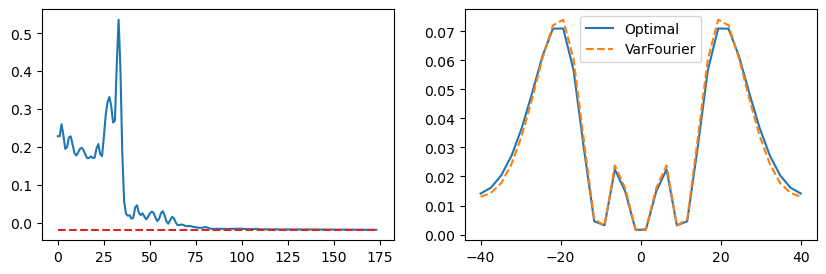

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10,3)) 

ax[0].plot( energies_excited4 )
ax[0].hlines( vals[4], 0, len(energies_excited4), colors='tab:red', linestyles='--' ) 

excited_state4 = varqft.state( params_excited4[-1] )

ax[1].plot(varqft.x_values, np.abs(vecs[4])**2) 
ax[1].plot(varqft.x_values, np.abs(excited_state4)**2, '--') 
ax[1].legend(['Optimal','VarFourier']) 

In [26]:
fidelity = abs(np.vdot(excited_state4, vecs[4]))**2
fidelity

0.9988921958967685

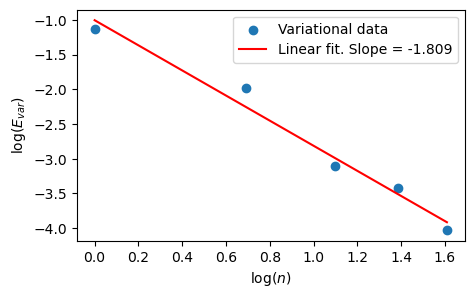

Pendiente = -1.8091182108426669


In [27]:

fig, ax = plt.subplots(1, 1, figsize=(5,3)) 

x = np.log(np.arange(1,6))
y = np.log(np.abs(vals[0:5]))
ax.scatter(x , y, label = 'Variational data')

slope, intercept = np.polyfit(x, y, 1)
y_fit = slope * x + intercept
plt.plot(x, y_fit, color='red', label=f'Linear fit. Slope = {slope:3.3f}')

plt.xlabel('$\log(n)$')
plt.ylabel('$\log(E_{var})$')

plt.legend()
#plt.savefig('../figures/Hydrogen_atom_energies.png')
plt.show()

print(f'Pendiente = {slope}')



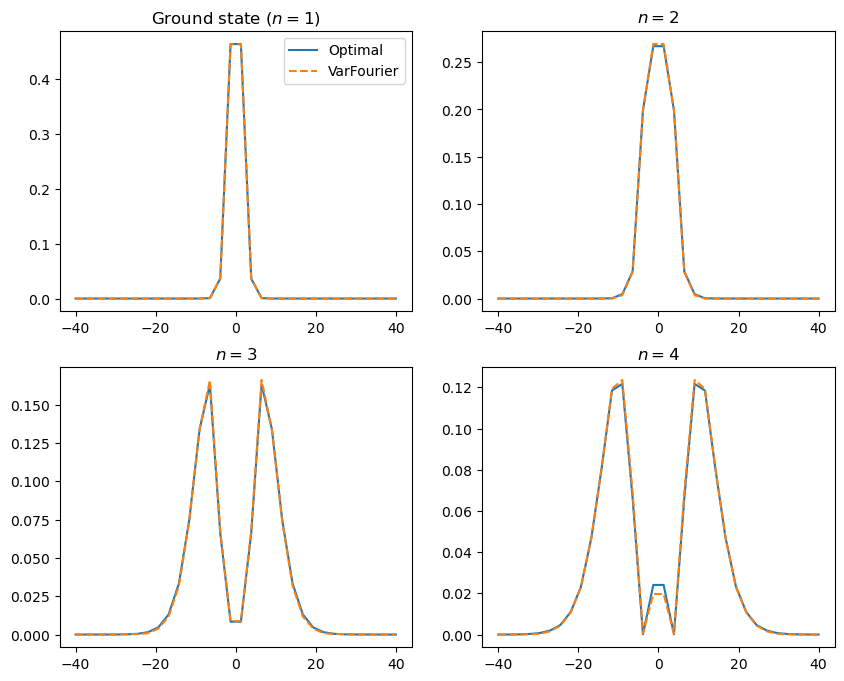

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(10,8)) 

x = varqft.x_values
ground_state = varqft.state( params_ground[-1] )

ax[0,0].plot(x, np.abs(vecs[0])**2 ) 
ax[0,0].plot(x, np.abs(ground_state)**2, '--' ) 
ax[0,0].legend(['Optimal','VarFourier']) 
ax[0,0].set_title('Ground state ($n=1$)')

ax[0,1].plot(x, np.abs(vecs[1])**2) 
ax[0,1].plot(x, np.abs(excited_state)**2, '--' )
ax[0,1].set_title('$n=2$')

ax[1,0].plot(x, np.abs(vecs[2])**2) 
ax[1,0].plot(x, np.abs(excited_state2)**2, '--' ) 
ax[1,0].set_title('$n=3$')

ax[1,1].plot(x, np.abs(vecs[3])**2) 
ax[1,1].plot(x, np.abs(excited_state3)**2, '--' ) 
ax[1,1].set_title('$n=4$')

#plt.savefig('../figures/Hydrogen_atom_first4states.png')
plt.show()